# KHAI BÁO THƯ VIỆN

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
import joblib
from sklearn.model_selection import GridSearchCV

## ĐỌC VÀ MÔ TẢ DỮ LIỆU

In [41]:
df=pd.read_csv('holistic_health_lifestyle_dataset.csv')
df.head(20)

,Physical_Activity,Nutrition_Score,Stress_Level,Mindfulness,Sleep_Hours,Hydration,BMI,Alcohol,Smoking,Overall_Health_Score,Health_Status
0,54.934283,5.643011,5.696572,0.000000,6.292214,2.578565,24.275932,4.280610,8.984006,36.950187,Poor
1,42.234714,6.389001,5.566647,4.450144,8.519054,2.448713,25.970141,7.461846,3.223304,55.167774,Average
2,57.953771,5.805238,3.126960,9.129716,6.702720,3.261433,25.193857,0.000000,4.600482,78.304426,Good
3,75.460597,7.220836,6.159168,16.496689,7.135854,3.726265,19.527300,9.958423,3.947706,94.018274,Good
4,40.316933,9.394357,2.019835,25.241623,8.076086,3.049478,23.348229,4.320347,8.084322,100.000000,Good
5,40.317261,5.457916,3.691631,21.941359,6.911555,3.309235,26.284728,3.438906,6.716783,88.758120,Good
6,76.584256,9.001641,1.001824,3.206752,4.273228,2.326077,25.463141,0.000000,16.437920,60.372330,Average
7,60.348695,5.436656,8.117253,11.282877,8.560881,2.600324,21.263454,0.452641,2.695139,80.430716,Good
8,35.610512,5.304746,4.536901,15.763756,8.882393,3.688586,25.455662,1.489827,15.757114,71.172442,Good
9,55.851201,8.637189,9.333768,12.377929,4.253326,2.921369,27.202112,0.000000,0.000000,81.568796,Good


*   Physical_Activity: Số phút hoạt động thể chất
*   Nutrition_Score: Điểm dinh dưỡng
*   Strees_Level: Mức độ căng thẳng
*   Mindfulness: Thời gian dành chánh niệm
*   Sleep_Hours: Số giờ ngủ trung bình mỗi đêm
*   Hydration: Lít nước tiêu thụ mỗi ngày (0,5–5,0)
*   BMI: Chỉ số khối cơ thể (18–40)
*   Alcohol: Đơn vị rượu mỗi tuần (0–20)
*   Smoking: Thuốc lá mỗi ngày (0–30)
*   Overall_Health_Score: Điểm số sức khỏe
*   Health_Status: Trạng thái sức khỏe











In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Physical_Activity     10000 non-null  float64
 1   Nutrition_Score       10000 non-null  float64
 2   Stress_Level          10000 non-null  float64
 3   Mindfulness           10000 non-null  float64
 4   Sleep_Hours           10000 non-null  float64
 5   Hydration             10000 non-null  float64
 6   BMI                   10000 non-null  float64
 7   Alcohol               10000 non-null  float64
 8   Smoking               10000 non-null  float64
 9   Overall_Health_Score  10000 non-null  float64
 10  Health_Status         10000 non-null  object 
dtypes: float64(10), object(1)
memory usage: 859.5+ KB


In [43]:
df.describe()

,Physical_Activity,Nutrition_Score,Stress_Level,Mindfulness,Sleep_Hours,Hydration,BMI,Alcohol,Smoking,Overall_Health_Score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,45.047069,6.966599,4.987202,15.224636,7.000194,2.503302,24.095086,3.523663,5.706911,78.227945
std,19.832871,1.883295,1.938195,9.454891,1.468580,0.801660,3.356663,3.270784,5.000260,19.697853
min,0.000000,0.000000,1.000000,0.000000,3.000000,0.500000,18.000000,0.000000,0.000000,2.217088
25%,31.548189,5.675978,3.599696,8.053871,6.003898,1.958461,21.653393,0.298894,1.065818,64.627060
50%,44.948100,7.031693,4.988464,14.896178,7.014341,2.506579,24.072122,2.980658,4.954994,81.118118
75%,58.421618,8.387730,6.327795,21.790305,8.025752,3.052666,26.380536,5.706382,8.991626,97.972163
max,120.000000,10.000000,10.000000,52.278333,10.000000,5.000000,36.376168,18.040621,27.978693,100.000000


In [44]:
df.nunique().sort_values()

Health_Status              3
Alcohol                 7727
Overall_Health_Score    7761
Smoking                 8005
Nutrition_Score         9300
Mindfulness             9329
BMI                     9595
Stress_Level            9741
Sleep_Hours             9751
Physical_Activity       9888
Hydration               9919
dtype: int64

# Phân tích dữ liệu

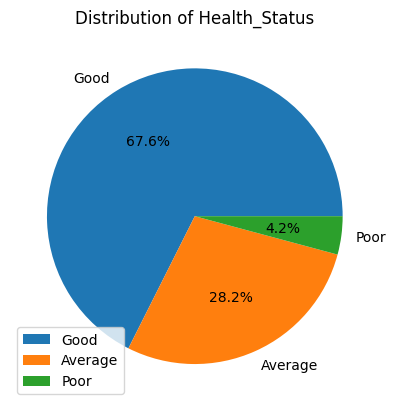

In [45]:
plt.pie(df['Health_Status'].value_counts(), labels=df['Health_Status'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Health_Status')
plt.legend()
plt.show()

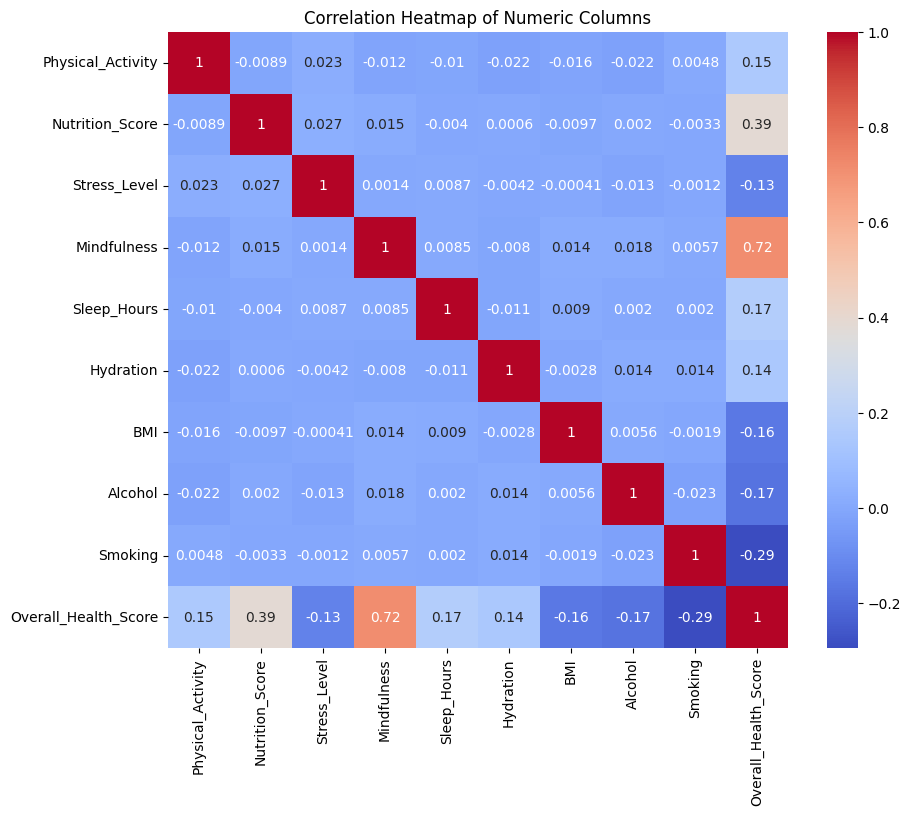

In [46]:
plt.figure(figsize=(10,8))
numeric_df = df.select_dtypes(include='number')  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

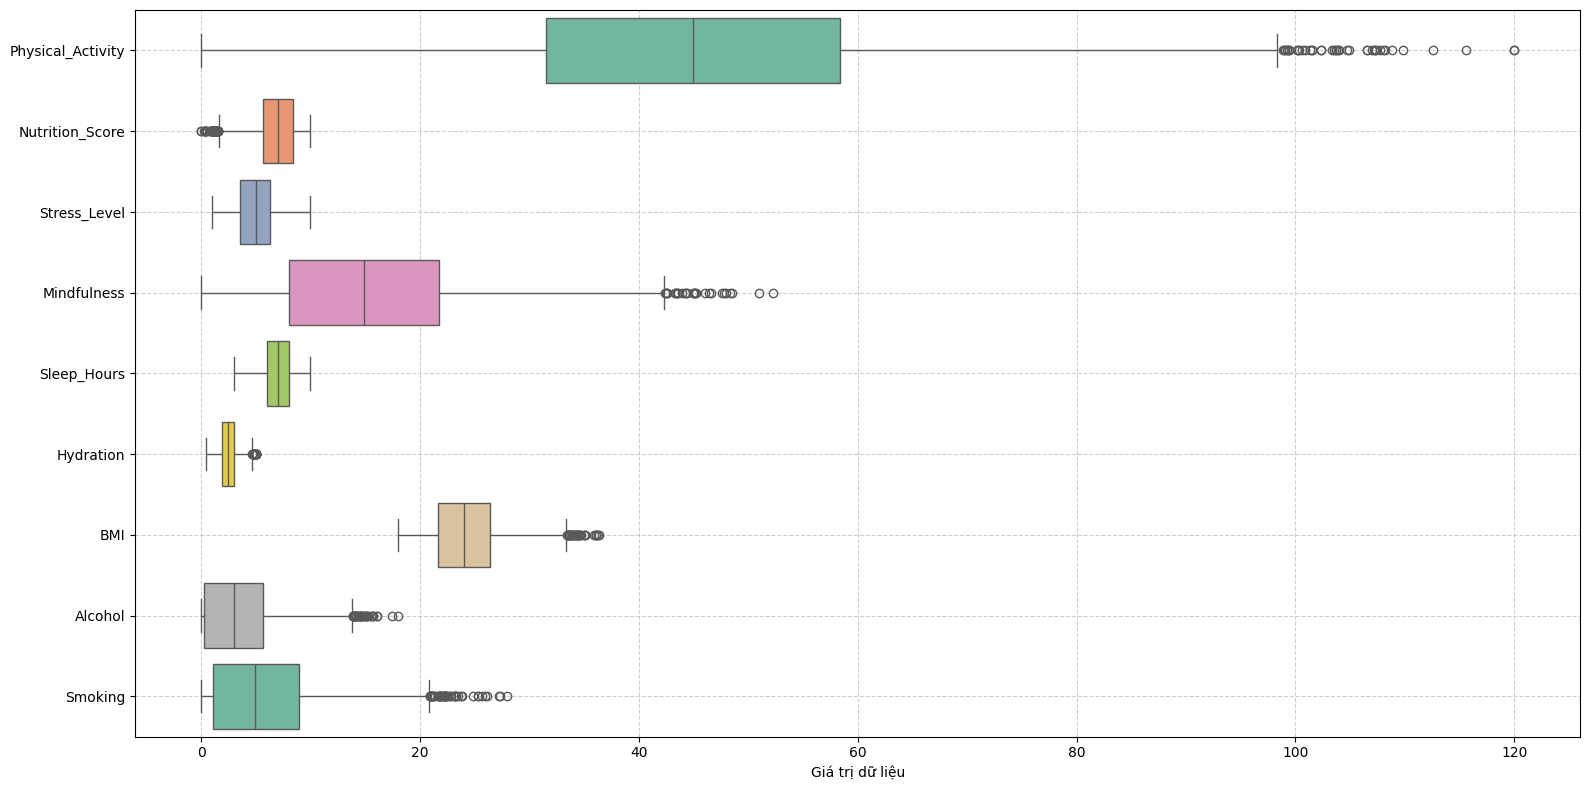

In [47]:

features_to_check = [
    "Physical_Activity",
    "Nutrition_Score",
    "Stress_Level",
    "Mindfulness",
    "Sleep_Hours",
    "Hydration",
    "BMI",
    "Alcohol",
    "Smoking"

]

plt.figure(figsize=(16, 8))


sns.boxplot(data=df[features_to_check], orient='h', palette="Set2")
plt.xlabel("Giá trị dữ liệu")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Tiền xử lý dữ liệu
1. Kiểm tra dữ liệu bị thiếu
2. Xử lý mất cân bằng dữ liệu
3. Chuẩn hoá dữ liệu continuous



### 1. Kiểm tra dữ liệu bị thiếu

In [48]:
df.isnull().sum()

Physical_Activity       0
Nutrition_Score         0
Stress_Level            0
Mindfulness             0
Sleep_Hours             0
Hydration               0
BMI                     0
Alcohol                 0
Smoking                 0
Overall_Health_Score    0
Health_Status           0
dtype: int64

### 2. Chuẩn hoá dữ liệu continuous


In [49]:
X = df[['Physical_Activity','Nutrition_Score','Stress_Level','Mindfulness','Sleep_Hours','Hydration','BMI','Alcohol','Smoking']]
y = df['Health_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 3. Xử lý dữ liệu mất cân bằng



In [50]:
smote = SMOTE()
X_res_scaled, y_res = smote.fit_resample(X_train_scaled, y_train)
print(y_res.value_counts())


Health_Status
Average    5386
Good       5386
Poor       5386
Name: count, dtype: int64


# Cài đặt mô hình

Random Forest với dữ liệu chưa Smote

In [51]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_class = rf.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred_class))

Classification Report:
               precision    recall  f1-score   support

     Average       0.84      0.84      0.84       551
        Good       0.94      0.97      0.95      1373
        Poor       0.94      0.43      0.59        76

    accuracy                           0.91      2000
   macro avg       0.91      0.75      0.80      2000
weighted avg       0.91      0.91      0.91      2000



Random Forest với dữ liệu đã áp dụng Smote

In [52]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_res_scaled, y_res)
y_pred_class = rf.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred_class))

Classification Report:
               precision    recall  f1-score   support

     Average       0.83      0.89      0.86       551
        Good       0.97      0.94      0.95      1373
        Poor       0.79      0.74      0.76        76

    accuracy                           0.92      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.92      0.92      0.92      2000



In [53]:

model = SVC()
param_grid = {
    'kernel': ['linear', 'rbf']
}
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    verbose=3, # để in ra tiến trình
    n_jobs=-1 # sử dụng tất cả các nhân CPU
)
grid_search.fit(X_res_scaled, y_res)
print(grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_class = best_model.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred_class))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan]
  warnings.warn(


{'kernel': 'linear'}
Classification Report:
               precision    recall  f1-score   support

     Average       0.97      0.99      0.98       551
        Good       1.00      0.99      0.99      1373
        Poor       0.94      1.00      0.97        76

    accuracy                           0.99      2000
   macro avg       0.97      0.99      0.98      2000
weighted avg       0.99      0.99      0.99      2000



In [54]:

model = SVC()
param_grid = {
    'kernel': ['linear', 'rbf']
}
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    verbose=3, # để in ra tiến trình
    n_jobs=-1 # sử dụng tất cả các nhân CPU
)
grid_search.fit(X_train_scaled, y_train)
print(grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_class = best_model.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred_class))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'kernel': 'linear'}
Classification Report:
               precision    recall  f1-score   support

     Average       0.99      1.00      0.99       551
        Good       1.00      1.00      1.00      1373
        Poor       1.00      0.97      0.99        76

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan]
  warnings.warn(


In [55]:
model_demo = SVC(kernel='linear') # Bạn có thể chọn kernel='rbf' tùy bài toán
model_demo.fit(X_res_scaled, y_res)
joblib.dump(model_demo, 'svm.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']